##  Exploring Age, Gender, and Health Conditions as Predictors of Mortality in Heart Failure Patients

### Table of Contents
1. Project Overview**# 
1.1 Introduction*# *
1.1.1 Problem Statement# **
1.2 Objectives**
2. Importing Packages**
3. Loading Data**
4. Data Cleaning**
5. Exploratory Data Analysisn6g SpriCots
10. 7nclusion**
11. References

### Project Overview

### Introduction

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, with heart failure being a major contributor. Understanding the factors that influence mortality in heart failure patients—particularly age, gender, and pre-existing conditions like hypertension and diabetes—can help in identifying high-risk individuals and improving patient outcomes.

This project explores the relationships between demographic factors and health conditions in predicting mortality among heart failure patients. Using a dataset with 12 key variables from 299 patients, we aim to develop a machine learning model that can assess mortality risk, providing insights that could support healthcare providers in early intervention and personalized treatment strategies

### Problem statement 

Heart failure, a common outcome of cardiovascular disease, presents a significant mortality risk globally. Early identification of patients at high risk can support proactive healthcare and reduce mortality. This project explores the influence of age, gender, and coexisting health conditions on mortality in heart failure patients, aiming to provide actionable insights for improved patient management

### Objectives

1. To analyze how age and gender impact the prevalence of health conditions (e.g., diabetes, hypertension, anemia) in  heart failure patients.
2. To assess mortality risk across different demographic groups and health conditions.

### Importing Packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Loading data

In [2]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.shape

(299, 13)

import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df .info()

### Data Cleaning 

In [28]:
# Round the ages to the nearest whole number
df['age'] = df['age'].round().astype(int)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Checking for null or empty entries in the data frame

In [30]:
# Check for null (NaN) values in each column
print("Null values in each column:")
print(df.isnull().sum())

# Check for empty strings in each column (optional, in case some data is missing as empty strings)
print("\nEmpty string entries in each column:")
print((df.apply(lambda x: x == '').sum()))


Null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Empty string entries in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## unique values and their counts in the DEATH_EVENT column

In [45]:
print("Unique entries in the DEATH_EVENT column:")
print(df['DEATH_EVENT'].value_counts())


Unique entries in the DEATH_EVENT column:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


We can also do the same for all other columns, We saw ww 

# The minimum and maximum time of duration on follow-ups 

In [101]:
print("Minimum value in the time column:", df['time'].min())
print("Maximum value in the time column:", df['time'].max())

Minimum value in the time column: 4
Maximum value in the time column: 285


## Using describe function

In [47]:
from scipy.stats import pearsonr
from lifelines import KaplanMeierFitter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.836120    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            

In [12]:
!pip install lifelines


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   ---------------------------------------- 349.3/349.3 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ---------------------------------------- 52.5/52.5 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4050 sha256=c2fdbda4de7fccebeaf05252b28361857bd9166995b7ec02786d7fa5c41894c7
  Stored in directory: c:\users\kagis\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


# Correlation analysis

In [97]:
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088222                 -0.081672   
anaemia                   0.088222  1.000000                 -0.190741   
creatinine_phosphokinase -0.081672 -0.190741                  1.000000   
diabetes                 -0.100791 -0.012729                 -0.009639   
ejection_fraction         0.060049  0.031557                 -0.044080   
high_blood_pressure       0.093347  0.038182                 -0.070590   
platelets                -0.052294 -0.043786                  0.024463   
serum_creatinine          0.159161  0.052174                 -0.016408   
serum_sodium             -0.045992  0.041882                  0.059550   
sex                       0.065371 -0.094769                  0.079791   
smoking                   0.018539 -0.107290                  0.002421   
time                     -0.223969 -0.141414                 -0.009346   
DEATH_EVENT      

## Visualize the correlation matrix

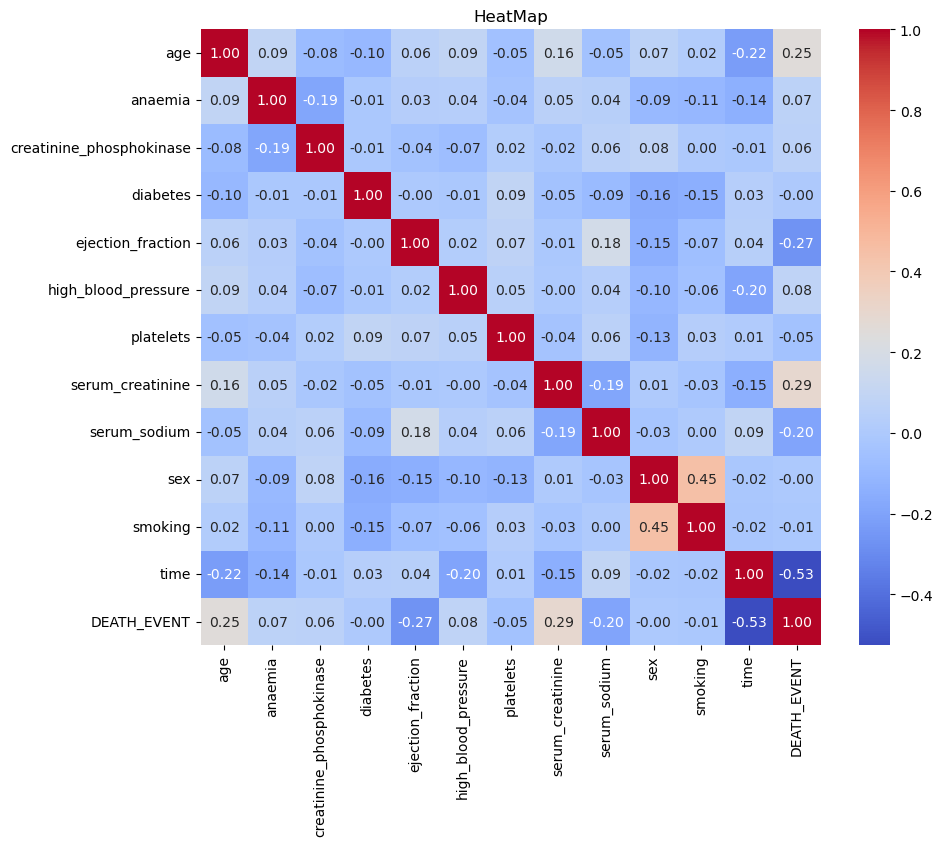

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('HeatMap')
plt.show()


# Group survival analysis by 'high_blood_pressure' 0= Not diabetic, 1= Diabetic

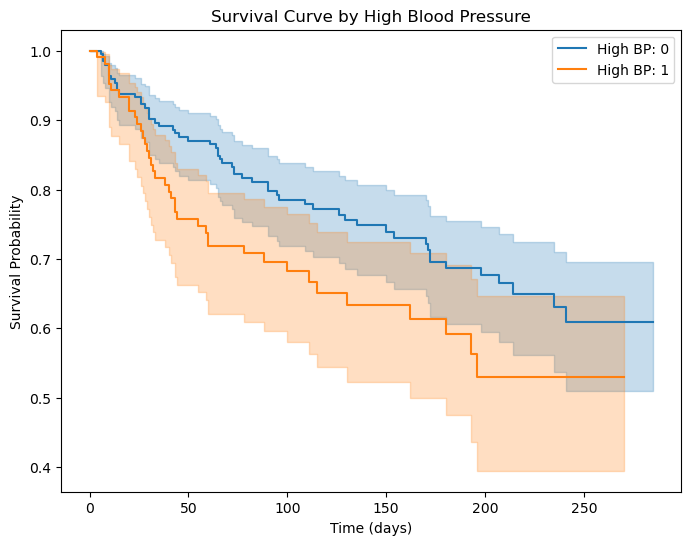

In [22]:
plt.figure(figsize=(8, 6))
for label, grouped_df in df.groupby('high_blood_pressure'):
    kmf.fit(grouped_df['time'], event_observed=grouped_df['DEATH_EVENT'], label=f"High BP: {label}")
    kmf.plot_survival_function()
plt.title('Survival Curve by High Blood Pressure')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


## Box plot comparison of serum creatinine by DEATH_EVENT

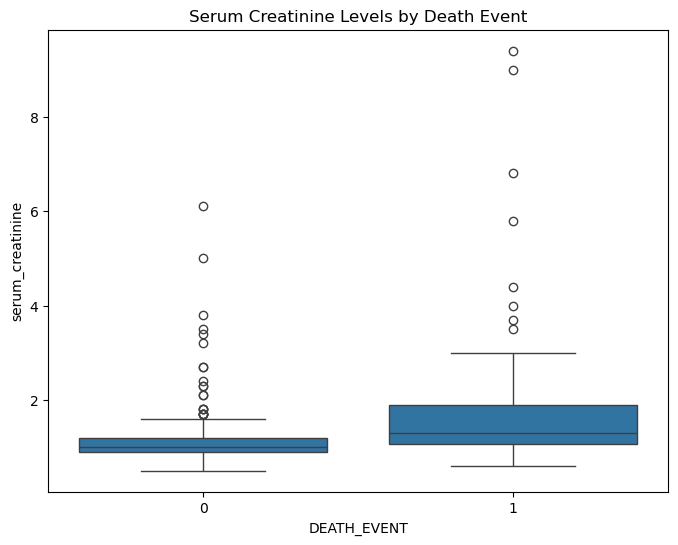

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Death Event')
plt.show()

# Violin plot comparison of age by DEATH_EVENT

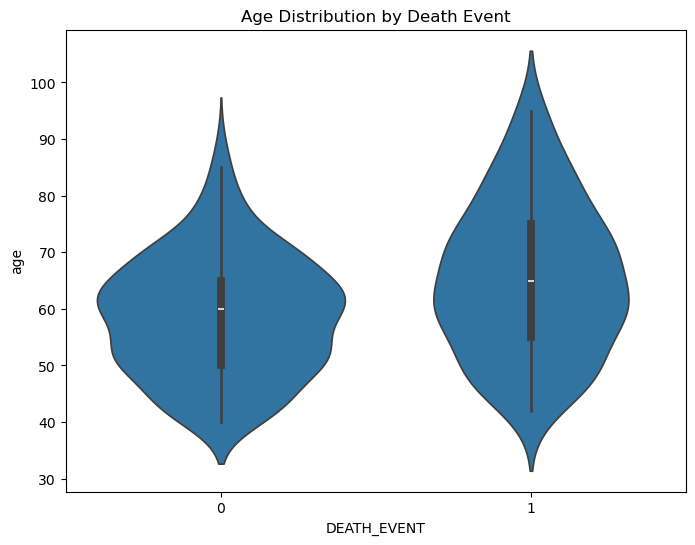

In [73]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by Death Event')
plt.show()


Pariplot to see relationships between the variables

# Risk Factor Analysis with Multivariate Plot

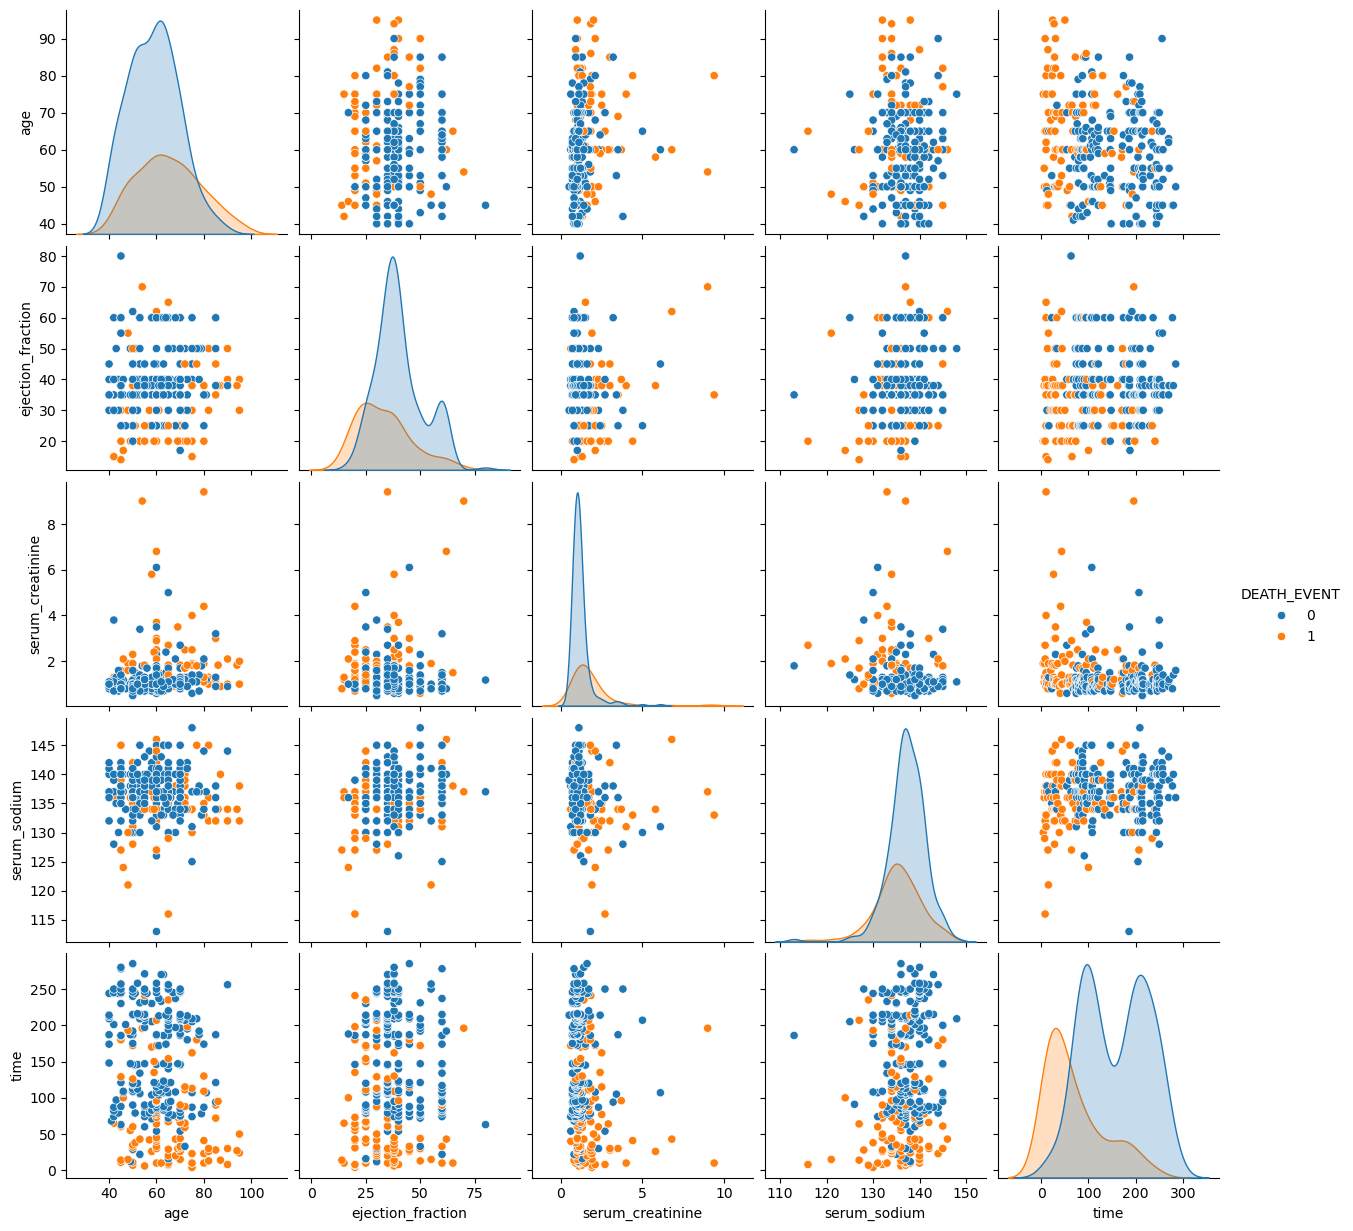

In [78]:
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.show()


## Checking the relationship between 

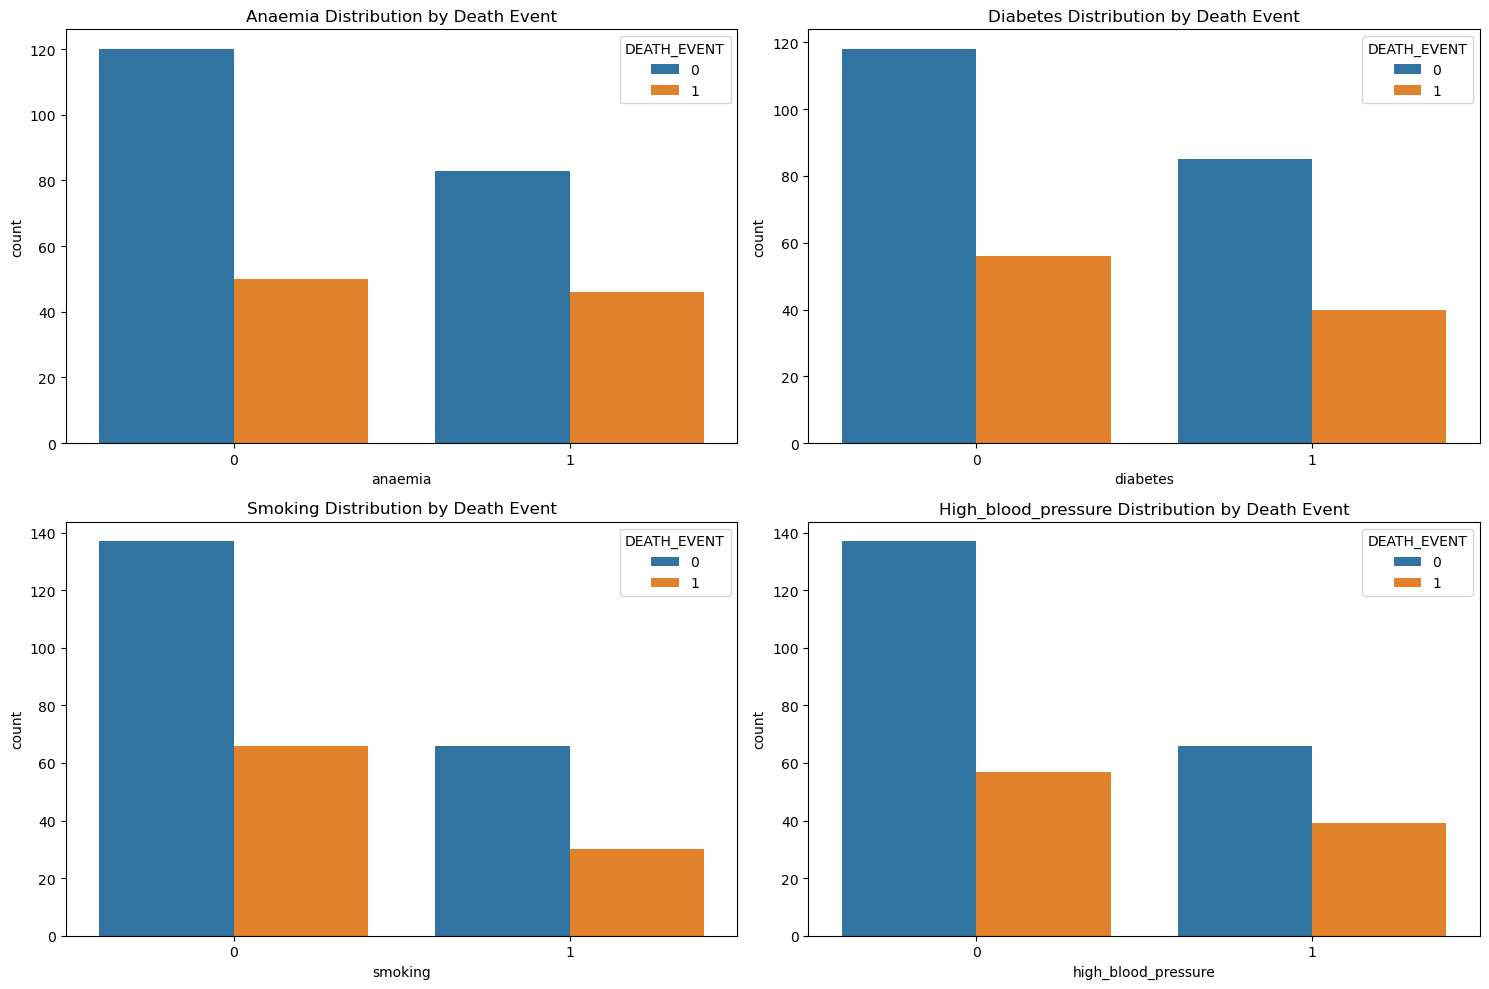

In [82]:
# Count plot for 'anaemia', 'diabetes', 'smoking', 'high_blood_pressure'
categorical_vars = ['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='DEATH_EVENT', data=df)
    plt.title(f'{var.capitalize()} Distribution by Death Event')
plt.tight_layout()
plt.show()



In [84]:
# Calculate and Display Important Feature Correlations with DEATH_EVENT
for col in df.columns:
    if col != 'DEATH_EVENT':
        corr, _ = pearsonr(df[col], df['DEATH_EVENT'])
        print(f"Correlation between {col} and DEATH_EVENT: {corr:.2f}")


Correlation between age and DEATH_EVENT: 0.25
Correlation between anaemia and DEATH_EVENT: 0.07
Correlation between creatinine_phosphokinase and DEATH_EVENT: 0.06
Correlation between diabetes and DEATH_EVENT: -0.00
Correlation between ejection_fraction and DEATH_EVENT: -0.27
Correlation between high_blood_pressure and DEATH_EVENT: 0.08
Correlation between platelets and DEATH_EVENT: -0.05
Correlation between serum_creatinine and DEATH_EVENT: 0.29
Correlation between serum_sodium and DEATH_EVENT: -0.20
Correlation between sex and DEATH_EVENT: -0.00
Correlation between smoking and DEATH_EVENT: -0.01
Correlation between time and DEATH_EVENT: -0.53
